<h1>Importuri</h1>

In [2]:
import csv
import os
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

<h1>Incarcare date</h1>

In [3]:
# load some data
crtDir =  os.getcwd()
fileName = os.path.join(crtDir,'reviews_mixed.csv')

data = []
with open(fileName) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            dataNames = row
        else:
            data.append(row)
        line_count += 1

inputs = [data[i][0] for i in range(len(data))]
outputs = [data[i][1] for i in range(len(data))]
labelNames = list(set(outputs))

print(inputs[:2])
print(labelNames[:2])
print("Inputs length: ", len(inputs))

['The rooms are extremely small, practically only a bed.', 'Room safe did not work.']
['positive', 'negative']
Inputs length:  207


<h1>Impartire date (train si test)</h1>

In [4]:
# prepare data for training and testing
np.random.seed(5)
# noSamples = inputs.shape[0]
noSamples = len(inputs)
indexes = [i for i in range(noSamples)]
trainSample = np.random.choice(indexes, int(0.8 * noSamples), replace = False)
testSample = [i for i in indexes  if not i in trainSample]

trainInputs = [inputs[i] for i in trainSample]
trainOutputs = [outputs[i] for i in trainSample]
testInputs = [inputs[i] for i in testSample]
testOutputs = [outputs[i] for i in testSample]

print(trainInputs[:3])

['still easy to reach.', 'Some thinks didnt work well : air, tv , open windows,', 'Room was not cleaned even once during our stay.']


<h1>Extragere caracteristici: Word2Vec</h1>

In [4]:
# representation 3: embedded features extracted by a pre-train model (in fact, word2vec pretrained model)

import gensim 
from gensim.models import KeyedVectors

# Încarcă modelul pre-antrenat Word2Vec
word2vecModel300 = KeyedVectors.load_word2vec_format('C:/Users/ariis/gensim-data/word2vec-google-news-300/word2vec-google-news-300.gz', binary=True)

# Verificare
print(word2vecModel300.most_similar('support'))
print("vec for house: ", word2vecModel300["house"])

[('supporting', 0.6251285076141357), ('suport', 0.6071150302886963), ('suppport', 0.6053199768066406), ('Support', 0.6044272780418396), ('supported', 0.6009396314620972), ('backing', 0.6007589101791382), ('supports', 0.5269277691841125), ('assistance', 0.5207138061523438), ('sup_port', 0.5192490220069885), ('supportive', 0.5110024809837341)]
vec for house:  [ 1.57226562e-01 -7.08007812e-02  5.39550781e-02 -1.89208984e-02
  9.17968750e-02  2.55126953e-02  7.37304688e-02 -5.68847656e-02
  1.79687500e-01  9.27734375e-02  9.03320312e-02 -4.12109375e-01
 -8.30078125e-02 -1.45507812e-01 -2.37304688e-01 -3.68652344e-02
  8.74023438e-02 -2.77099609e-02  1.13677979e-03  8.30078125e-02
  3.57421875e-01 -2.61718750e-01  7.47070312e-02 -8.10546875e-02
 -2.35595703e-02 -1.61132812e-01 -4.78515625e-02  1.85546875e-01
 -3.97949219e-02 -1.58203125e-01 -4.37011719e-02 -1.11328125e-01
 -1.05957031e-01  9.86328125e-02 -8.34960938e-02 -1.27929688e-01
 -1.39648438e-01 -1.86523438e-01 -5.71289062e-02 -1.176

In [5]:
word = "casuta"
if (word in word2vecModel300.index_to_key):
    print("vec for house: ", word2vecModel300[word])
else:
    print("word was not found!")

word was not found!


<h1>Extragere caracteristici: NMF</h1>

In [6]:
# TF-IDF vectorization
# Textul de intrare (inputs) este vectorizat folosind TF-IDF (Term Frequency-Inverse Document Frequency).
# Aceasta transformă textul într-o matrice sparse unde fiecare rând reprezintă un document, iar fiecare coloană
# reprezintă un cuvânt, cu valorile fiind scorurile TF-IDF.

tfidf_vec = TfidfVectorizer()
X_tfidf = tfidf_vec.fit_transform(inputs)
print('TF-IDF Features:')
print(X_tfidf)

TF-IDF Features:
  (0, 64)	0.2893085727015972
  (0, 387)	0.3480899536524405
  (0, 419)	0.5099776093875098
  (0, 496)	0.327928661338903
  (0, 203)	0.4271896229962418
  (0, 44)	0.3408579972841346
  (0, 458)	0.3166200185521639
  (0, 548)	0.16910405219061794
  (1, 639)	0.5131321148341721
  (1, 378)	0.34289308121680606
  (1, 157)	0.5131321148341721
  (1, 463)	0.5373494787534413
  (1, 457)	0.2589801884095966
  (2, 117)	0.5573104262579094
  (2, 608)	0.4200192012565964
  (2, 345)	0.7162324757786385
  (3, 360)	0.30485495869460266
  (3, 647)	0.23479535216984185
  (3, 565)	0.2881146363818544
  (3, 194)	0.275129833612689
  (3, 462)	0.3284491178247016
  (3, 547)	0.24092631812165655
  (3, 138)	0.30485495869460266
  (3, 411)	0.30485495869460266
  (3, 638)	0.19744564580599855
  :	:
  (204, 631)	0.1275457341843858
  (204, 135)	0.1275457341843858
  (204, 296)	0.10294705335797014
  (204, 626)	0.21590716305566585
  (204, 37)	0.2893964896687671
  (204, 619)	0.06391769913935104
  (204, 375)	0.10619276997241

In [7]:
# NMF feature extraction
#NMF are nevoie de date numerice
# Reducerea dimensionalității și pentru a descoperi structuri ascunse în date. Nu avem valori negatime !

nmf = NMF(n_components=10, random_state=42)
X_nmf = nmf.fit_transform(X_tfidf)
print('NMF Features:')
print(X_nmf)

NMF Features:
[[0.         0.         0.43261488 ... 0.         0.         0.        ]
 [0.09782536 0.         0.         ... 0.26107285 0.         0.        ]
 [0.         0.46743239 0.         ... 0.         0.         0.        ]
 ...
 [0.0013359  0.01035042 0.04588831 ... 0.05469005 0.19071359 0.20177074]
 [0.01918721 0.         0.         ... 0.01101209 0.00345811 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [8]:
word_index = tfidf_vec.vocabulary_.get("casuta")

if word_index is not None:
    # Retrieve the corresponding vector from the NMF components
    word_vector = nmf.components_[:, word_index]
    print("vec for house: ", word_vector)
else:
    print("word was not found!")

word was not found!


<h1>Etichetarea textelor cu emotii folosind kMeans: tool</h1>

In [9]:
def featureComputation(model, data):
    features = []
    phrases = [ phrase.split() for phrase in data]
    for phrase in phrases:
        # compute the embeddings of all the words from a phrase (words of more than 2 characters) known by the model
        # vectors = [model[word] for word in phrase if (len(word) > 2) and (word in model.vocab.keys())]
        vectors = [model[word] for word in phrase if (len(word) > 2) and (word in model.index_to_key)]
        if len(vectors) == 0:
            result = [0.0] * model.vector_size
        else:
            result = np.sum(vectors, axis=0) / len(vectors)
        features.append(result)
    return features

trainFeatures = featureComputation(word2vecModel300, trainInputs)
testFeatures = featureComputation(word2vecModel300, testInputs)

In [10]:
unsupervisedClassifier = KMeans(n_clusters=2, random_state=2)
unsupervisedClassifier.fit(trainFeatures)

KMeans(n_clusters=2, random_state=2)

In [11]:
computedTestIndexes = unsupervisedClassifier.predict(testFeatures)
computedTestOutputs = [labelNames[value] for value in computedTestIndexes]
for i in range(0, len(testInputs)):
    print(testInputs[i], " -> ", computedTestOutputs[i])

The rooms are extremely small, practically only a bed.  ->  negative
Mattress very comfortable.  ->  positive
The bed was soooo comfy.  ->  negative
The bed is very comfortable.  ->  negative
Very spacious rooms, quiet and very comfortable.  ->  positive
The building was under renovation,  ->  negative
no elevator might be a challenge for some people  ->  negative
Pay extra.. :( Room was tiny  ->  positive
Bathtub not clean.  ->  positive
Barely room for anything else than sleep.  ->  negative
The bed was highly uncomfortable, although the engineer fixed it  ->  negative
Every 15 minutes door were slamming & lights on.  ->  negative
More plug outlets with surge protectors.  ->  negative
Elevators are slow, very long lines.  ->  negative
Room was very spacious  ->  positive
Bathroom was extra small,  ->  positive
No elevator.  ->  negative
No wardrobe, no space for luggage, no towel change, walls are not sound proof thus very noisy.  ->  negative
very spartan.  ->  negative
No walls mea

In [12]:
print("acc: ", accuracy_score(testOutputs, computedTestOutputs))

acc:  0.6428571428571429


<h1>Etichetarea textelor cu emotii folosind Azure</h1>

In [13]:
from azure.core.credentials import AzureKeyCredential
from azure.ai.textanalytics import TextAnalyticsClient

In [14]:
os.environ["LANGUAGE_ENDPOINT"] = "https://stanariana.cognitiveservices.azure.com/"
os.environ["LANGUAGE_KEY"] = "2e2cf96bd8724aa490741bc1d3a94bbb"

endpoint = os.environ["LANGUAGE_ENDPOINT"]
key = os.environ["LANGUAGE_KEY"]
client = TextAnalyticsClient(endpoint=endpoint, credential=AzureKeyCredential(key))

In [15]:
documents = [
    "By choosing a bike over a car, I’m reducing my environmental footprint. Cycling promotes eco-friendly transportation, and I’m proud to be part of that movement.."
]

result = client.analyze_sentiment(documents, show_opinion_mining=True)
docs = [doc for doc in result if not doc.is_error]

print("Let's visualize the sentiment of each of these documents")
for idx, doc in enumerate(docs):
    print(f"Document text: {documents[idx]}")
    print(f"Overall sentiment: {doc.sentiment}")

Let's visualize the sentiment of each of these documents
Document text: By choosing a bike over a car, I’m reducing my environmental footprint. Cycling promotes eco-friendly transportation, and I’m proud to be part of that movement..
Overall sentiment: positive


<h1> Cod kMeans Implementat </h1>

In [24]:
import numpy as np
from sklearn.datasets import make_blobs

class KMeans:
    def __init__(self, n_clusters, max_iters=100):
        self.n_clusters = n_clusters
        self.max_iters = max_iters

    def fit(self, X):
        # Initialize centroids randomly
        self.centroids = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]
        
        for _ in range(self.max_iters):
            # Assign each data point to the nearest centroid
            labels = self._assign_labels(X)
            
            # Update centroids
            new_centroids = self._update_centroids(X, labels)
            
            # Check for convergence
            if np.all(self.centroids == new_centroids):
                break
                
            self.centroids = new_centroids

    def _assign_labels(self, X):
        # Compute distances from each data point to centroids
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        
        # Assign labels based on the nearest centroid
        return np.argmin(distances, axis=1)
    
    def _update_centroids(self, X, labels):
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(self.n_clusters)])
        return new_centroids

    def plot_clusters(self, X, labels):
        plt.figure(figsize=(8, 6))
        plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.5)
        plt.scatter(self.centroids[:, 0], self.centroids[:, 1], marker='x', color='red', s=200)
        plt.title("Cluster Assignments")
        plt.show()

def toBinary(labels):
    result = []
    for label in labels: 
        if label == 'positive':
            result.append(1)
        else:
           result.append(0)
    return result

In [17]:
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD

In [21]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(inputs)

# Reducerea dimensionalității
svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(X)

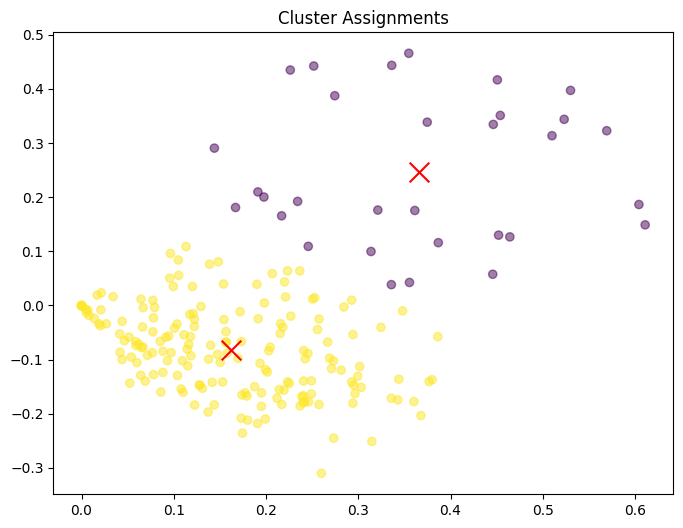

In [25]:
# Creează o instanță a algoritmului K-Means cu 2 clustere
kmeans = KMeans(n_clusters=2)

# Aplică algoritmul pe datele tale
kmeans.fit(X_svd)

#max_iter!

# Obține etichetele clusterelor pentru datele de intrare
labels = kmeans._assign_labels(X_svd)

# Trasează grafic datele și centroidii lor
kmeans.plot_clusters(X_svd, labels)

<h1>Alternative la k-means si analiza performanta</h1>

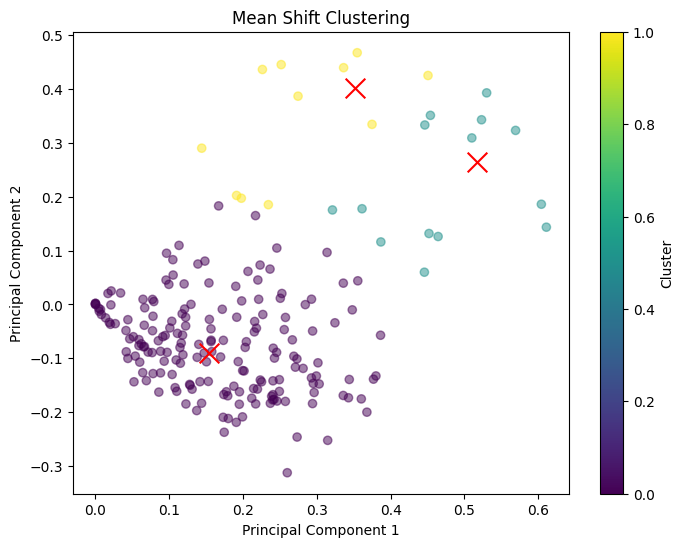

In [56]:
import os
import csv
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import MeanShift
from sklearn.decomposition import TruncatedSVD

# Încărcăm datele
crtDir =  os.getcwd()
fileName = os.path.join(crtDir, 'reviews_mixed.csv')

data = []
with open(fileName) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    next(csv_reader)  # Skip header
    for row in csv_reader:
        data.append(row)

inputs = [row[0] for row in data]

# Vectorizăm datele textuale
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(inputs)

# Reducerea dimensionalității
svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(X)

# Creăm o instanță a algoritmului Mean Shift
mean_shift = MeanShift()

# Aplicăm algoritmul pe datele noastre
mean_shift.fit(X_svd)

# Obținem etichetele clusterelor pentru datele de intrare
labels = mean_shift.labels_

# Obținem centrul clusterelor
centroids = mean_shift.cluster_centers_

# Plotăm rezultatele
plt.figure(figsize=(8, 6))
plt.scatter(X_svd[:, 0], X_svd[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red', s=200)
plt.title("Mean Shift Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Cluster')
plt.show()


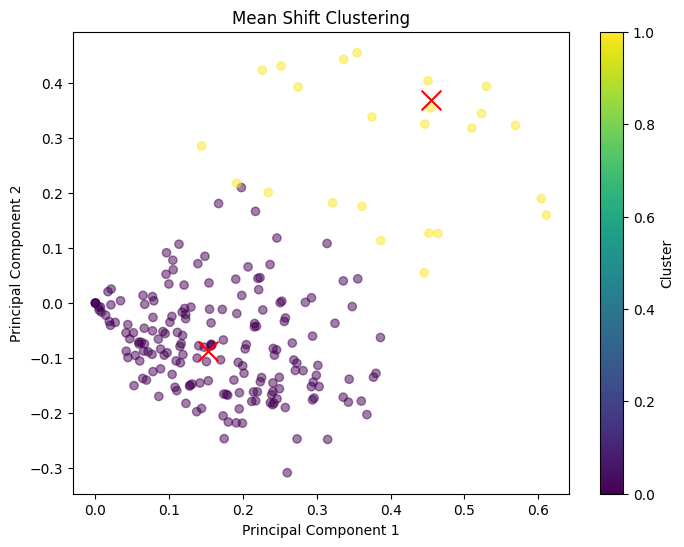

In [68]:
import os
import csv
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import MeanShift
from sklearn.decomposition import TruncatedSVD

# Încărcăm datele
crtDir =  os.getcwd()
fileName = os.path.join(crtDir, 'reviews_mixed.csv')

data = []
with open(fileName) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    next(csv_reader)  # Skip header
    for row in csv_reader:
        data.append(row)

inputs = [row[0] for row in data]

# Vectorizăm datele textuale
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(inputs)

# Reducerea dimensionalității
svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(X)

# Creăm o instanță a algoritmului Mean Shift
# Se creează o instanță a algoritmului MeanShift. 
# Acest algoritm de clustering nu necesită specificarea numărului de clustere în prealabil. 
# Mean Shift identifică modurile în distribuția datelor și asociază fiecare punct de date cu cel mai apropiat mod.

mean_shift = MeanShift()

# Aplicăm algoritmul pe datele noastre
mean_shift.fit(X_svd)

# Obținem etichetele clusterelor pentru datele de intrare
labels = mean_shift.labels_

# Obținem centrul clusterelor
centroids = mean_shift.cluster_centers_

# Plotăm rezultatele
plt.figure(figsize=(8, 6))
plt.scatter(X_svd[:, 0], X_svd[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red', s=200)
plt.title("Mean Shift Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Cluster')
plt.show()
